In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingRegressor,RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.pipeline import make_pipeline
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sns.set()

In [2]:
df = pd.read_csv('../data/shot-data-all.csv')
df_top = pd.read_csv('../data/top-def.csv')
df_mid = pd.read_csv('../data/mid-def.csv')
df_bot = pd.read_csv('../data/bot-def.csv')

In [3]:
def return_model():
    return make_pipeline(
    StandardScaler(), 
    PCA(8), 
    GradientBoostingRegressor()
    )
def train_test(df,test_size):
    X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
    y = df['cum_shot_made']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    return X_train, X_valid, y_train, y_valid

(array([ 75., 237., 197., 204., 137.,  90.,  60.,  34.,  11.,   3.]),
 array([-0.55452161,  1.05838301,  2.67128763,  4.28419224,  5.89709686,
         7.51000148,  9.1229061 , 10.73581072, 12.34871533, 13.96161995,
        15.57452457]),
 <a list of 10 Patch objects>)

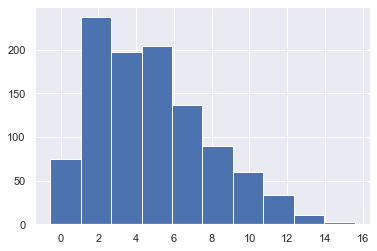

In [43]:
#TOP DEFENSE
top_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_top, 0.25)
top_def_model.fit(X_train,y_train)
y_predict1 = top_def_model.predict(X_valid)
plt.hist(y_predict1)

(array([119., 202., 197., 190., 139., 122.,  80.,  52.,  22.,   6.]),
 array([-0.58050141,  0.97479376,  2.53008892,  4.08538409,  5.64067925,
         7.19597441,  8.75126958, 10.30656474, 11.8618599 , 13.41715507,
        14.97245023]),
 <a list of 10 Patch objects>)

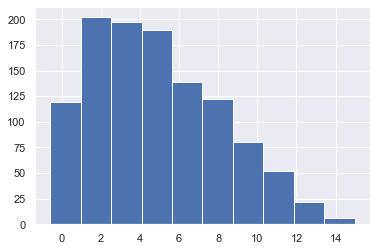

In [44]:
#MID DEFENSE
mid_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_mid, 0.25)
mid_def_model.fit(X_train,y_train) 
y_predict2 = mid_def_model.predict(X_valid)
plt.hist(y_predict2)

(array([110., 199., 219., 163., 121., 106.,  57.,  24.,   3.,   5.]),
 array([-0.57508748,  1.05775142,  2.69059031,  4.32342921,  5.95626811,
         7.589107  ,  9.2219459 , 10.8547848 , 12.48762369, 14.12046259,
        15.75330149]),
 <a list of 10 Patch objects>)

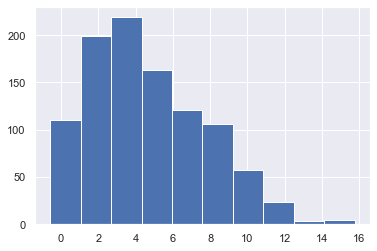

In [45]:
#BOTTOM DEFENSE 
bot_def_model = return_model()
X_train, X_valid, y_train, y_valid = train_test(df_bot, 0.25)
bot_def_model.fit(X_train,y_train)
y_predict3 = bot_def_model.predict(X_valid)
plt.hist(y_predict3)

In [46]:
#ANOVA TEST
#Step 0: level of signifance is 0.05
#Step 1: H_0: There is no statistical difference between top, middle, bottom defensive teams.
#        H_A: There is a statistical difference between top, middle, bottom defensive teams.
#Step 2: 
anova = stats.f_oneway(y_predict1,y_predict2,y_predict3)
print(anova.pvalue)
#Step 3:
#We concluded that our p-value > 0.05, which means we failed to reject the Null Hypothesis and it may seem there 
#is no statistical difference.

0.23369197920694762
